In [1]:
# KNN - on yahoo fin data
# preprocessing

import time
import random
from math import *
import operator
import pandas as pd
import numpy as np

# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline 

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

# import the ML algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from statsmodels.tools.eval_measures import rmse

# pre-processing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing.data import QuantileTransformer

# import libraries for model validation
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# import libraries for metrics and reporting
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import metrics


In [2]:
location = r"E:\\MYLEARN\\2-ANALYTICS-DataScience\\datasets\\yahoo.csv"

In [3]:
# load the training data from yahoo fin data set
df_yahoo_fin = pd.read_csv(location)
df_yahoo_fin.head()

,2002-01-03,18.700001,19.290001,18.540001,9.565,up
0,2002-01-04,19.000000,19.809999,18.530001,9.450,down
1,2002-01-07,18.700001,19.940001,18.650000,9.865,up
2,2002-01-08,19.400000,19.730000,19.250000,9.765,down
3,2002-01-09,19.799999,21.350000,19.770000,10.125,up
4,2002-01-10,20.059999,20.709999,19.950001,10.245,up


In [25]:
# Check the available styles
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 '_classic_test']

In [26]:
plt.style.use('ggplot')

In [27]:
X = df_wine.drop('quality' , 1).values # drop target variable
y1 = df_wine['quality'].values

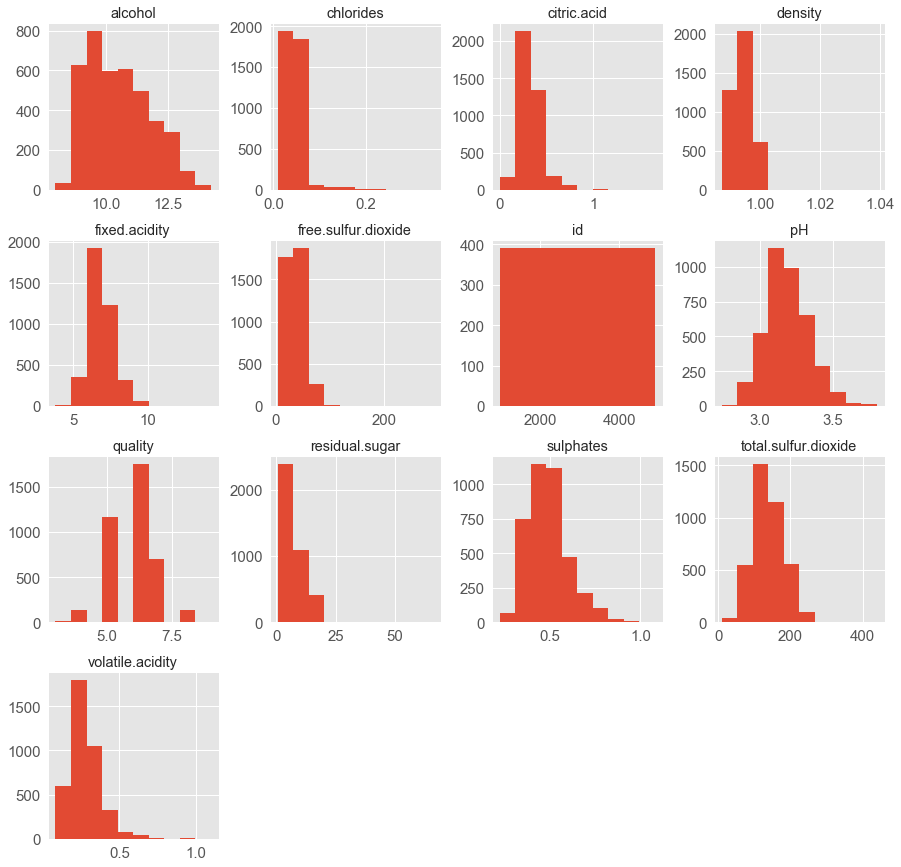

In [28]:
pd.DataFrame.hist(df_wine, figsize = [15,15]);

In [34]:
# First notice the range of the predictor variables: 
# 'free sulfur dioxide' - ranges from 0 to ~70 and 
# 'volatile acidity' from ~0 to ~1.2. 

# k-NN, which cares about the distance between data points, may thus 
# focus squarely and unfairly on variables with a larger range, 
# such as 'free sulfur dioxide', a variable that may contain only noise.

In [29]:
# Now the target variable is a 'Quality' rating of wine and ranges from 
# 3 to 8. let's turn it into a 
# two-category variable consisting of 
# 'good' (rating > 5) & 
# 'bad' (rating <= 5).

In [30]:
y = y1 <= 5 # is the rating <= 5?
y

array([False, False,  True, ...,  True, False,  True], dtype=bool)

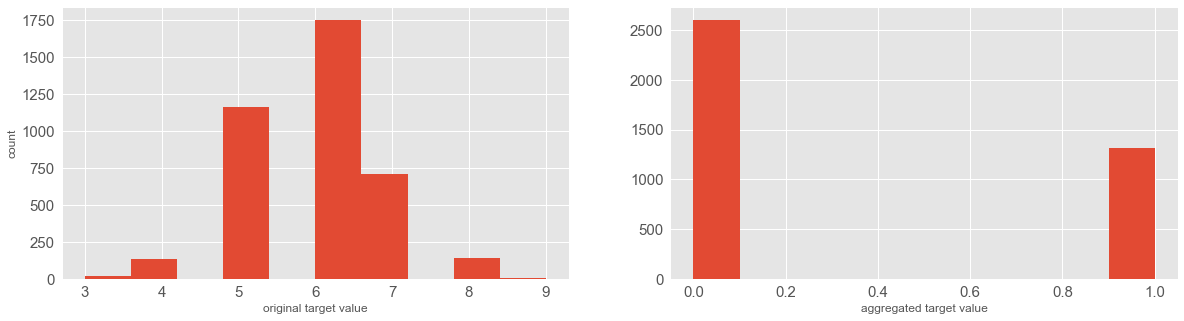

In [31]:
# plot histograms of original target variable
# and aggregated target variable
plt.figure(figsize=(20,5));

plt.subplot(1, 2, 1 );
plt.hist(y1);
plt.xlabel('original target value')
plt.ylabel('count')

plt.subplot(1, 2, 2);
plt.hist(y)
plt.xlabel('aggregated target value');

In [32]:
# compare how the model performs with and without preprocessing

In [33]:
# train - test split (wine quality data)
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [34]:
# build the k-NN model
knn = KNeighborsClassifier(n_neighbors = 5)
knn_model_1 = knn.fit(X_train, y_train)

print('k-NN accuracy for test set: %f' % knn_model_1.score(X_test, y_test))

k-NN accuracy for test set: 0.641582


In [35]:
# It is worth reiterating that the default scoring method for k-NN in 
# scikit-learn is accuracy. An accuracy of 61% is not great but for an 
# out of the box model without any preprocessing it's not horrible either. 

In [36]:
# other metrics
y_true, y_pred = y_test, knn_model_1.predict(X_test)

print(classification_report(y_true, y_pred))

             precision    recall  f1-score   support

      False       0.70      0.81      0.75       526
       True       0.43      0.29      0.35       258

avg / total       0.61      0.64      0.62       784



In [37]:
# Now we're going to introduce scaling and centering, the most basic 
# methods of preprocessing numerical data, and see if and how they effect 
# our model performance.

In [38]:
# preprocessing: scaling and centering
Xs = scale(X)

In [39]:
Xs_train, Xs_test, y_train, y_test = train_test_split(Xs, y, test_size=0.2, random_state=42)

In [40]:
knn_model_2 = knn.fit(Xs_train, y_train)

In [41]:
print('k-NN score for test set: %f' % knn_model_2.score(Xs_test, y_test))
print('k-NN score for training set: %f' % knn_model_2.score(Xs_train, y_train))

k-NN score for test set: 0.752551
k-NN score for training set: 0.832163


In [19]:
y_true, y_pred = y_test, knn_model_2.predict(Xs_test)
print(classification_report(y_true, y_pred))

             precision    recall  f1-score   support

      False       0.80      0.85      0.82       526
       True       0.64      0.55      0.60       258

avg / total       0.75      0.75      0.75       784



In [20]:
# All these measures improved by 0.1, which is a 16% improvement and 
# significant! As hinted at above, before scaling there were a number of 
# predictor variables with ranges of different order of magnitudes, meaning 
# that one or two of them could dominate in the context of an algorithm 
# such as k-NN. 

In [ ]:
# The two main reasons for scaling your data are
# (1)
# predictor variables may have significantly different ranges and in 
# certain situations, such as when implementing k-NN, this needs to be 
# mitigated so that certain features do not dominate the algorithm
# (2)
# You want your features to be unit-independent, that is, not reliant on 
# the scale of the measurement involved